In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
nmap = pd.read_csv('/content/drive/MyDrive/IOT2022/RT_IOT2022.csv')

In [11]:
import re

nmap = nmap.query('Attack_type.str.contains("^NMAP")')

In [12]:
nmap.Attack_type.value_counts()

,count
Attack_type,
NMAP_UDP_SCAN,2590
NMAP_XMAS_TREE_SCAN,2010
NMAP_OS_DETECTION,2000
NMAP_TCP_scan,1002
NMAP_FIN_SCAN,28


In [13]:
nmap.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [14]:
# Bulk analysis
nmap.groupby('Attack_type'
            )[['fwd_bulk_bytes', 'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate', 'bwd_bulk_rate'
              ]].mean()

,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate
Attack_type,,,,,,
NMAP_FIN_SCAN,0.000000,0.0,0.000000,0.0,0.000000,0.0
NMAP_OS_DETECTION,0.000000,0.0,0.000000,0.0,0.000000,0.0
NMAP_TCP_scan,0.000000,0.0,0.000000,0.0,0.000000,0.0
NMAP_UDP_SCAN,0.302026,0.0,0.006699,0.0,0.052136,0.0
NMAP_XMAS_TREE_SCAN,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [15]:
nmap[['payload_bytes_per_second', 'fwd_pkts_per_sec', 'flow_pkts_per_sec']].describe()

,payload_bytes_per_second,fwd_pkts_per_sec,flow_pkts_per_sec
count,7.630000e+03,7.630000e+03,7.630000e+03
mean,1.022088e+04,1.564042e+05,3.124217e+05
std,8.197104e+04,2.178682e+05,4.359801e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.398101e+05,2.796203e+05
75%,0.000000e+00,1.677722e+05,3.355443e+05
max,1.185590e+06,1.048576e+06,2.097152e+06


In [16]:
nmap[['payload_bytes_per_second', 'fwd_pkts_per_sec', 'flow_pkts_per_sec']].corr()

,payload_bytes_per_second,fwd_pkts_per_sec,flow_pkts_per_sec
payload_bytes_per_second,1.000000,-0.075111,-0.082159
fwd_pkts_per_sec,-0.075111,1.000000,0.999975
flow_pkts_per_sec,-0.082159,0.999975,1.000000


In [17]:
nmap.groupby('Attack_type')[['flow_duration', 'fwd_pkts_tot', 'active.min', 'active.max',
                             'active.tot', 'active.avg', 'active.std']].mean()

,flow_duration,fwd_pkts_tot,active.min,active.max,active.tot,active.avg,active.std
Attack_type,,,,,,,
NMAP_FIN_SCAN,0.023614,1.214286,33782.218184,33782.218184,33782.218184,33782.218184,0.000000
NMAP_OS_DETECTION,0.000008,1.000000,8.193493,8.193493,8.193493,8.193493,0.000000
NMAP_TCP_scan,0.000019,1.009980,18.816984,18.816984,18.816984,18.816984,0.000000
NMAP_UDP_SCAN,0.737766,2.069884,133596.486654,552924.411743,689971.073442,291829.405025,252603.027838
NMAP_XMAS_TREE_SCAN,0.001171,1.003483,1294.606716,1294.606716,1294.606716,1294.606716,0.000000


In [18]:
nmap.groupby('Attack_type')[['id.resp_p', 'proto']].agg(pd.Series.mode)

,id.resp_p,proto
Attack_type,,
NMAP_FIN_SCAN,22,tcp
NMAP_OS_DETECTION,"[1, 3, 4, 6, 7, 9, 13, 17, 19, 20, 21, 22, 23,...",tcp
NMAP_TCP_scan,8888,tcp
NMAP_UDP_SCAN,80,udp
NMAP_XMAS_TREE_SCAN,"[53, 80]",tcp


In [19]:
import matplotlib.pyplot as plt

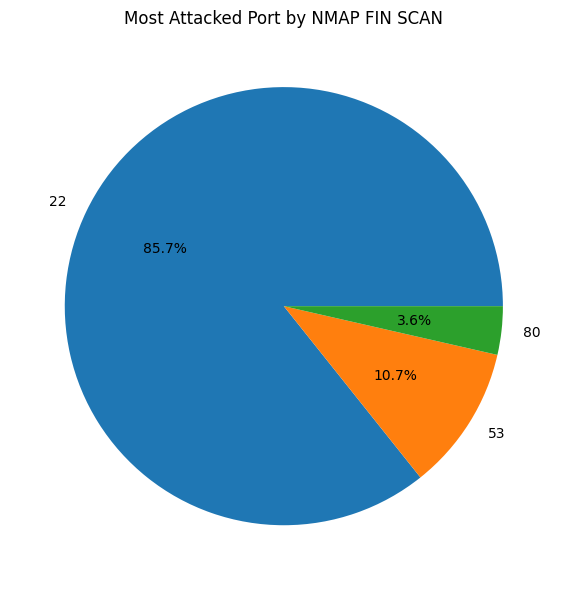

In [20]:
plt.figure(figsize=(10, 6))                         # size of the canvas(??) of the plot
plt.pie(nmap.query('Attack_type == "NMAP_FIN_SCAN"')['id.resp_p'].value_counts(),
        labels = nmap.query('Attack_type == "NMAP_FIN_SCAN"')['id.resp_p'].value_counts().index,
        autopct='%1.1f%%')

# layout fixes
plt.title('Most Attacked Port by NMAP FIN SCAN')
plt.tight_layout()
plt.show()

# identifying ports vulnerability to nmap stealth scans

In [21]:
nflags = nmap.groupby('Attack_type')[['flow_FIN_flag_count','flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
                             'flow_ACK_flag_count', 'fwd_URG_flag_count']].sum()

Text(0, 0.5, 'Triggers')

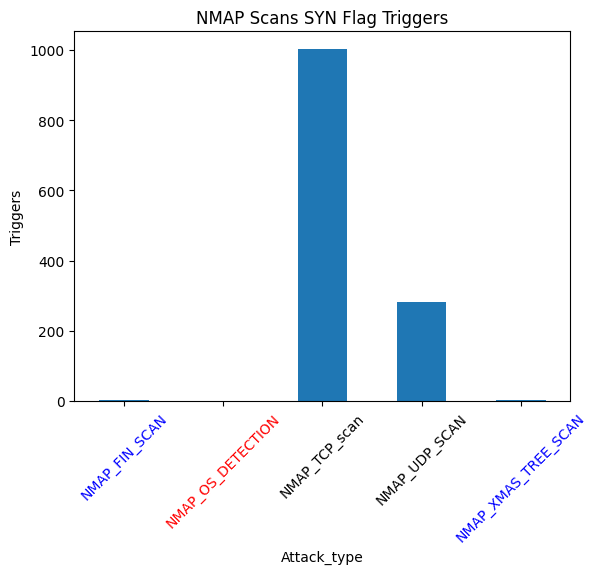

In [22]:
nflags.flow_SYN_flag_count.plot.bar()

plt.xticks(rotation = 45)
labels = plt.gca().get_xticklabels()
labels[0].set_color('blue')
labels[1].set_color('red')
labels[4].set_color('blue')

plt.title('NMAP Scans SYN Flag Triggers')
plt.ylabel('Triggers')

In [23]:
nmaps = nmap.query('Attack_type == "NMAP_FIN_SCAN" | Attack_type == "NMAP_XMAS_TREE_SCAN"')

In [24]:
nmaps.groupby('Attack_type')[['id.resp_p', 'proto']].agg(pd.Series.mode)

,id.resp_p,proto
Attack_type,,
NMAP_FIN_SCAN,22,tcp
NMAP_XMAS_TREE_SCAN,"[53, 80]",tcp


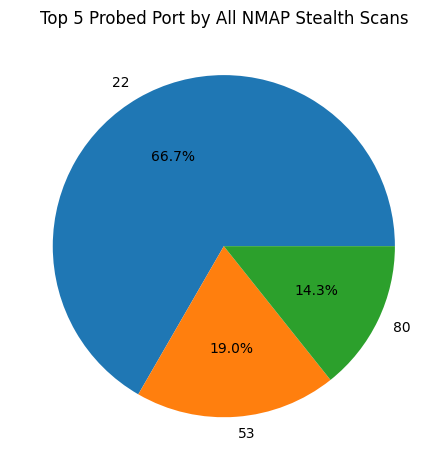

In [39]:
plt.pie(nmaps['id.resp_p'].value_counts().nlargest(3),
        labels = nmaps['id.resp_p'].value_counts().nlargest(3).index,
        autopct='%1.1f%%')

# layout fixes
plt.title('Top 5 Probed Port by All NMAP Stealth Scans')
plt.tight_layout()
plt.show()

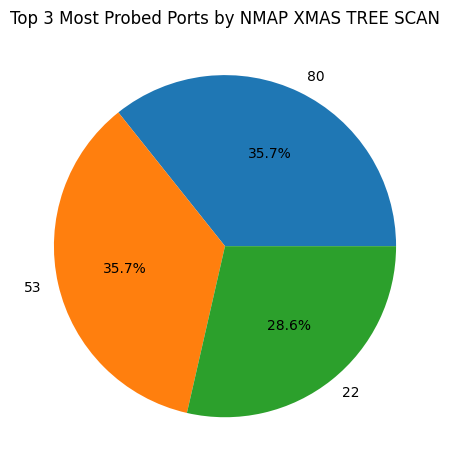

In [37]:
plt.pie(nmaps.query('Attack_type == "NMAP_XMAS_TREE_SCAN"')['id.resp_p'].value_counts().nlargest(3),
        labels = nmap.query('Attack_type == "NMAP_XMAS_TREE_SCAN"')['id.resp_p'].value_counts().nlargest(3).index,
        autopct='%1.1f%%')

# layout fixes
plt.title('Top 3 Most Probed Ports by NMAP XMAS TREE SCAN')
plt.tight_layout()
plt.show()

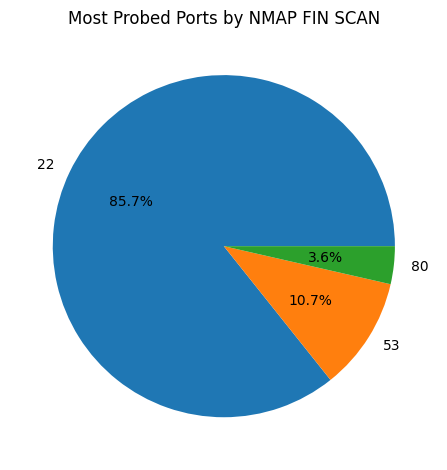

In [27]:
plt.pie(nmap.query('Attack_type == "NMAP_FIN_SCAN"')['id.resp_p'].value_counts(),
        labels = nmap.query('Attack_type == "NMAP_FIN_SCAN"')['id.resp_p'].value_counts().index,
        autopct='%1.1f%%')

# layout fixes
plt.title('Most Probed Ports by NMAP FIN SCAN')
plt.tight_layout()
plt.show()

In [28]:
xmas = nmap.query('Attack_type == "NMAP_XMAS_TREE_SCAN"')['id.resp_p'].value_counts()
xmas.head()

,count
id.resp_p,
80,5
53,5
22,4
8084,4
8008,2


<Figure size 1000x600 with 0 Axes>

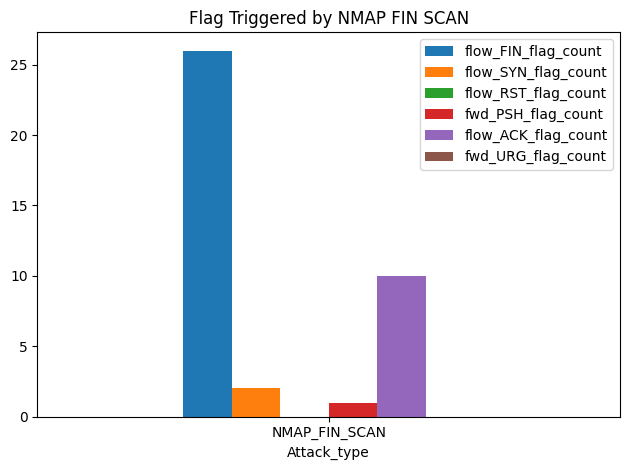

In [29]:
flags = nmaps.query('Attack_type == "NMAP_FIN_SCAN"').groupby('Attack_type')[['flow_FIN_flag_count','flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
                             'flow_ACK_flag_count', 'fwd_URG_flag_count']].sum()

plt.figure(figsize=(10, 6))                         # size of the canvas(??) of the plot
flags.plot(kind='bar')

# layout fixes
plt.xticks(rotation = 0)
plt.title('Flag Triggered by NMAP FIN SCAN')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

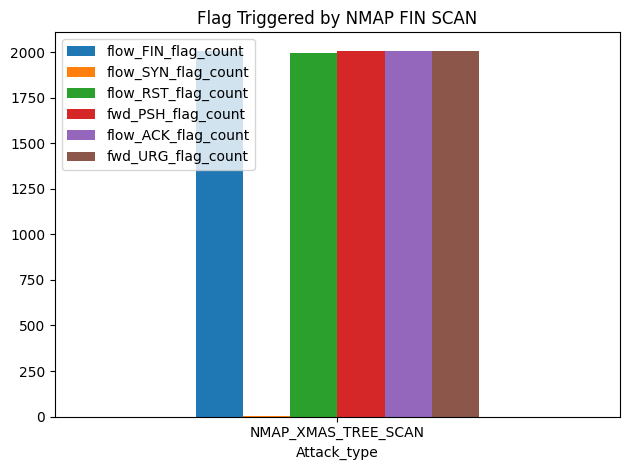

In [30]:
flags = nmaps.query('Attack_type == "NMAP_XMAS_TREE_SCAN"').groupby('Attack_type')[['flow_FIN_flag_count','flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
                             'flow_ACK_flag_count', 'fwd_URG_flag_count']].sum()

plt.figure(figsize=(10, 6))                         # size of the canvas(??) of the plot
flags.plot(kind='bar')

# layout fixes
plt.xticks(rotation = 0)
plt.title('Flag Triggered by NMAP FIN SCAN')
plt.tight_layout()
plt.show()

In [31]:
openned = nmaps[nmap['service'] != '-'][['id.resp_p', 'service', 'Attack_type']]

<ipython-input-31-3c8cf38bb6e2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  openned = nmaps[nmap['service'] != '-'][['id.resp_p', 'service', 'Attack_type']]


In [32]:
closed = nmaps[nmap['service'] == '-'][['id.resp_p', 'service', 'Attack_type']]

<ipython-input-32-aa32c227cfdc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  closed = nmaps[nmap['service'] == '-'][['id.resp_p', 'service', 'Attack_type']]


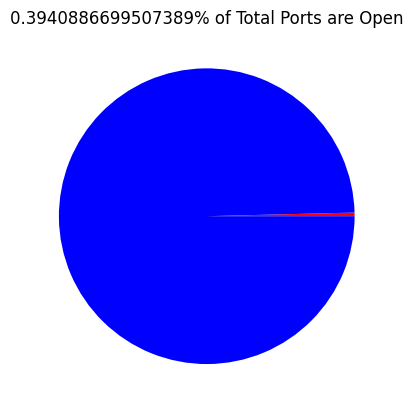

In [33]:
percent = (openned.shape[0] / closed.shape[0]) * 100
plt.pie([openned.shape[0], closed.shape[0]], colors = ['red', 'blue'])
plt.title(f"{percent}% of Total Ports are Open")
plt.show()

In [34]:
# Open ports detected by the NMAP Stealth Scans

openned

,id.resp_p,service,Attack_type
115487,80,http,NMAP_FIN_SCAN
115488,53,dns,NMAP_FIN_SCAN
115489,53,dns,NMAP_FIN_SCAN
115490,53,dns,NMAP_FIN_SCAN
121107,80,http,NMAP_XMAS_TREE_SCAN
121108,53,dns,NMAP_XMAS_TREE_SCAN
121109,53,dns,NMAP_XMAS_TREE_SCAN
121110,53,dns,NMAP_XMAS_TREE_SCAN
